<h1>Insertion Sort</h1>

In [6]:
import math
import numpy as np
import pylab as pl
%matplotlib inline

In [7]:
def insertion_sort(A):
    j = 1
    while j < len(A):
        key = A[j]
        i = j - 1
        while (i >= 0) and (A[i] > key):
            A[i + 1] = A[i]
            i = i -1
        A[i + 1] = key
        j = j + 1

In [8]:
B = np.random.permutation(range(0,10))
print B
insertion_sort(B)
print B

[4 5 3 9 8 0 6 2 1 7]
[0 1 2 3 4 5 6 7 8 9]


<h2>Correctitud</h2>

Invariante: Al comienzo de cada iteración del ciclo externo el subarreglo $A[0..j-1]$ consiste de los elementos originalmente en $A[0..j-1]$ pero ordenados.


In [21]:
def invariant(A, original_A):
    l1 = list(A)
    l2 = list(original_A)
    l2.sort()
    return l1 == l2

In [22]:
print invariant([1, 2, 3, 4], [4, 3, 2, 1])
print invariant([1, 2, 3, 4], [5, 3, 2, 1])

True
False


Algoritmo de ordenamiento por inserción incluyendo evaluación de la invariante (inicialización, mantenimiento, terminación)

In [23]:
def right_insertion_sort(A):
    original_A = list(A)
    j = 1
    assert invariant(A[0:j], original_A[0:j])
    while j < len(A):
        assert invariant(A[0:j], original_A[0:j])
        key = A[j]
        i = j - 1
        while (i >= 0) and (A[i] > key):
            A[i + 1] = A[i]
            i = i -1        
        A[i + 1] = key
        j = j + 1
    assert invariant(A[0:j], original_A[0:j])

La siguiente función incluye un error, por lo tanto la aserción para comprobar el invariante de ciclo falla. Esto genera una excepción que es capturada para imprimir un mensaje y el estado de las variables.

In [24]:
def wrong_insertion_sort(A):
    original_A = list(A)
    j = 1
    try:
        assert invariant(A[0:j], original_A[0:j])
        while j < len(A):
            assert invariant(A[0:j], original_A[0:j])
            key = A[j]
            i = j - 1
            while (i >= 0) and (A[i] < key):
                A[i + 1] = A[i]
                i = i - 1        
            A[i + 1] = key
            j = j + 1
        assert invariant(A[0:j], original_A[0:j])
    except  AssertionError:
        print "Error en el invariante de ciclo!"
        print "j=", j
        print "i=", i
        print "A=", A
        print "Original A=", original_A

<h2>Análisis del tiempo de ejecución</h2>

In [25]:
class Counter:
    '''
    Class Counter
    Implements a step counter, which is used to compute the number of basic operations performed in
    a particular call to a function.
    '''
    def __init__(self):
        self.steps = 0

    def reset(self):
        self.steps = 0

    def count(self):
        self.steps += 1

    def print_steps(self):
        print "Number of steps =", self.steps
        
def acct_insertion_sort(A, acct):
    j = 1; acct.count()
    acct.count()
    while j < len(A):
        acct.count()
        key = A[j]; acct.count()
        i = j - 1; acct.count()
        acct.count()
        while (i >= 0) and (A[i] > key):
            acct.count()
            A[i + 1] = A[i]; acct.count()
            i = i -1; acct.count()
        A[i + 1] = key; acct.count()
        j = j + 1; acct.count()

In [26]:
B = np.random.permutation(range(0,10))
acct = Counter()
acct_insertion_sort(B, acct)
acct.print_steps()

Number of steps = 113


<h2>Análisis experimental</h2>
Ahora vamos a analizar el comportamiento del algoritmo cuando el tamaño de la entrada varía. La siguiente función genera arreglos al azar de tamaño 1 a n, llama la función acct_insertion_sort(l, acct) y contabiliza el número de pasos.

In [27]:
import random as rnd

def exper_analysis(n):
    results = []
    acct = Counter()
    for i in range(n):
        l = range(i)
        rnd.shuffle(l)
        acct.reset()
        acct_insertion_sort(l, acct)
        results.append(acct.steps)
    return results

In [28]:
print exper_analysis(10)

[2, 2, 11, 14, 23, 38, 44, 80, 83, 110]


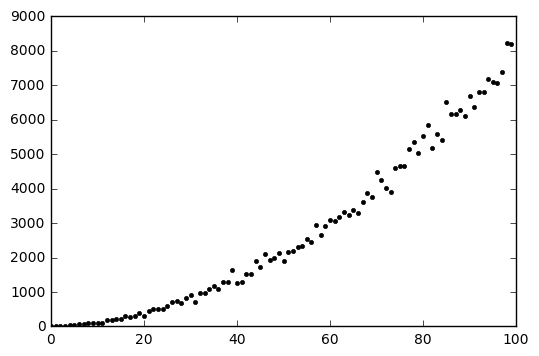

In [29]:
pl.clf()
x = np.arange(100)
y = np.array(exper_analysis(100))
pl.plot(x, y, 'k.')

<h2> Tiempo de ejecucion</h2>
Haciendo uso de la funcion time_analysis(n) se toma el tiempo para los distintos tamaños de arreglos desde 1 hasta n

In [42]:
import time
import random as rnd
def time_analysis(n):
    results = []
    for i in range(n):
        l = range(i)
        rnd.shuffle(l)
        t_inicial=time.clock()
        insertion_sort(l)
        t_final= time.clock()
        t_total=t_final-t_inicial
        results.append(t_total*10000000)
    return results

In [43]:
print time_analysis(10)

[16.553627233406587, 9.932176681104465, 16.553627233406587, 19.864352793774742, 19.86435336220893, 29.796529474879208, 36.41798059561552, 36.41798059561552, 59.593058949758415, 62.90378451012657]


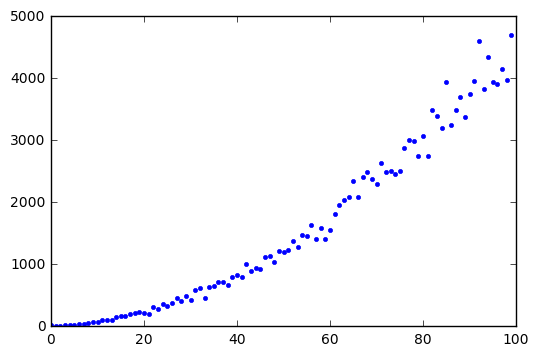

In [44]:
pl.clf()
x = np.arange(100)
y = np.array(time_analysis(100))
pl.plot(x, y, 'k.',color='blue')

<h2>Análisis Teórico</h2>

In [63]:
from math import log
def teoric_analysis(n):
    results = []
    for i in range(n):
        l = range(i)
        rnd.shuffle(l)
        i=i*i
        results.append(i)
    return results

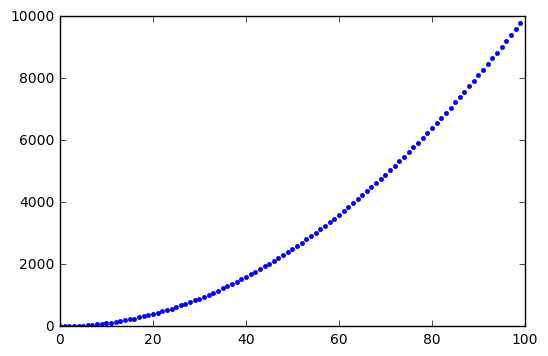

In [64]:
pl.clf()
x = np.arange(100)
y = np.array(teoric_analysis(100))
pl.plot(x, y, 'k.',color='blue')

<h1>Gráficas juntas</h1>

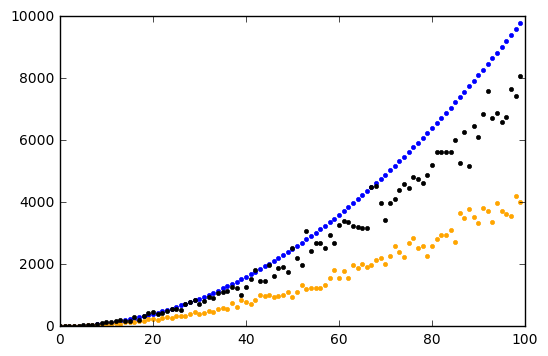

In [65]:
pl.clf()
x = np.arange(100)
y = np.array(teoric_analysis(100))
pl.plot(x, y, 'k.',color='blue')
x = np.arange(100)
y = np.array(time_analysis(100))
pl.plot(x, y, 'k.',color='orange') #Variable multiplicada por una constante muy grande
x = np.arange(100)
y = np.array(exper_analysis(100))
pl.plot(x, y, 'k.')